In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


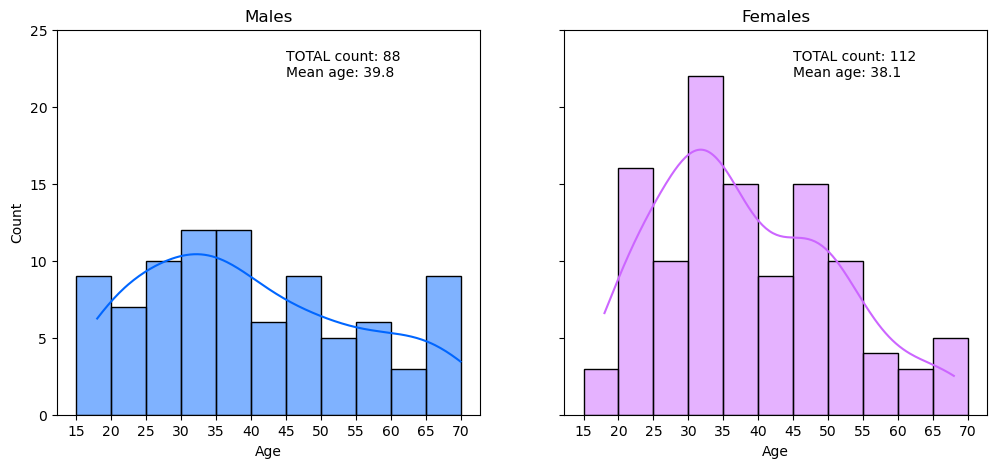

In [7]:
males_age = df[df['Gender'] == 'Male']['Age'] # subset with males age
females_age = df[df['Gender'] == 'Female']['Age'] # subset with females age

age_bins = range(15,75,5)

#males histogram

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sb.histplot(males_age, bins = age_bins, kde=True, color='#0066ff', ax=ax1)
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45, 23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

#females histogram

sb.histplot(females_age, bins = age_bins, kde= True, color='#cc66ff', ax=ax2)
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))
plt.show()

In [8]:
print('Kolgomorov-smirnov test p-value:{:.2f}'.format(stats.ks_2samp(males_age,females_age)[1]))

Kolgomorov-smirnov test p-value:0.49


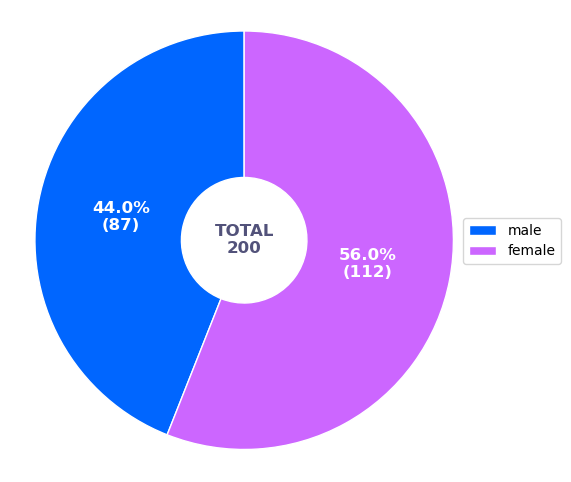

In [9]:
def labeler(pct, allvals):
    absolute= int(pct/100. *np.sum(allvals))
    return '{:.1f}%\n({:d})'.format(pct, absolute)

sizes = [males_age.count(), females_age.count()] # wedge sizes

fig0, ax1 = plt.subplots(figsize=(6,6)) 
wedges, texts, autotexts=ax1.pie(sizes,
                                 autopct=lambda pct: labeler (pct, sizes),
                                 radius=1,colors=['#0066ff', '#cc66ff'],
                                 startangle=90,textprops=dict(color="w"), 
                                 wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male', 'female'],
           loc='center right',
           bbox_to_anchor= (0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(df['Age'].count()),
         weight ='bold', size=12, color="#52527a", ha ='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal') #Equal aspect ratio
plt.show()

In [10]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income','Spending Score (1-100)': 'spending_score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.drop(['CustomerID'],axis = 1,inplace=True)

In [12]:
df.head()

,Gender,Age,Income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


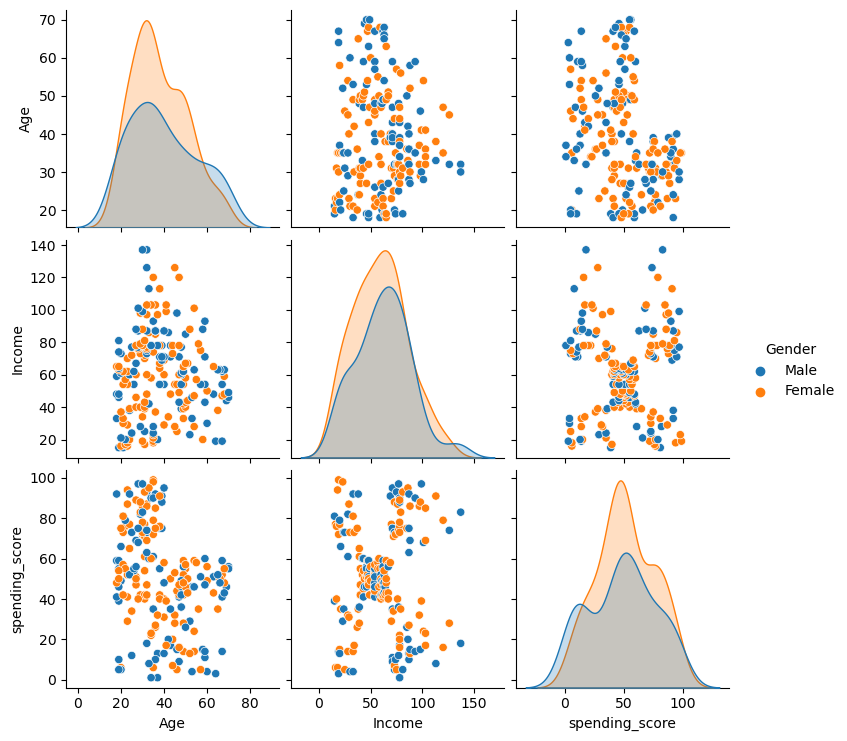

In [13]:
sb.pairplot(df,hue = 'Gender')
plt.show()

In [14]:
df = pd.get_dummies(df, columns = [ 'Gender'])

In [15]:
df


,Age,Income,spending_score,Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [16]:
df.head()

,Age,Income,spending_score,Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [17]:
df.rename(index=str, columns={'Gender_Female': 'sex'}, inplace=True)
df.head()

,Age,Income,spending_score,sex,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [18]:
df.drop(['Gender_Male'],axis = 1,inplace=True)

In [19]:
df.head()

,Age,Income,spending_score,sex
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [20]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

inertias = []
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df)
    inertias.append(km.inertia_)
    distortions.append(sum(np.min(cdist(df, km.cluster_centers_,'euclidean'), axis=1)) / df.shape[0])


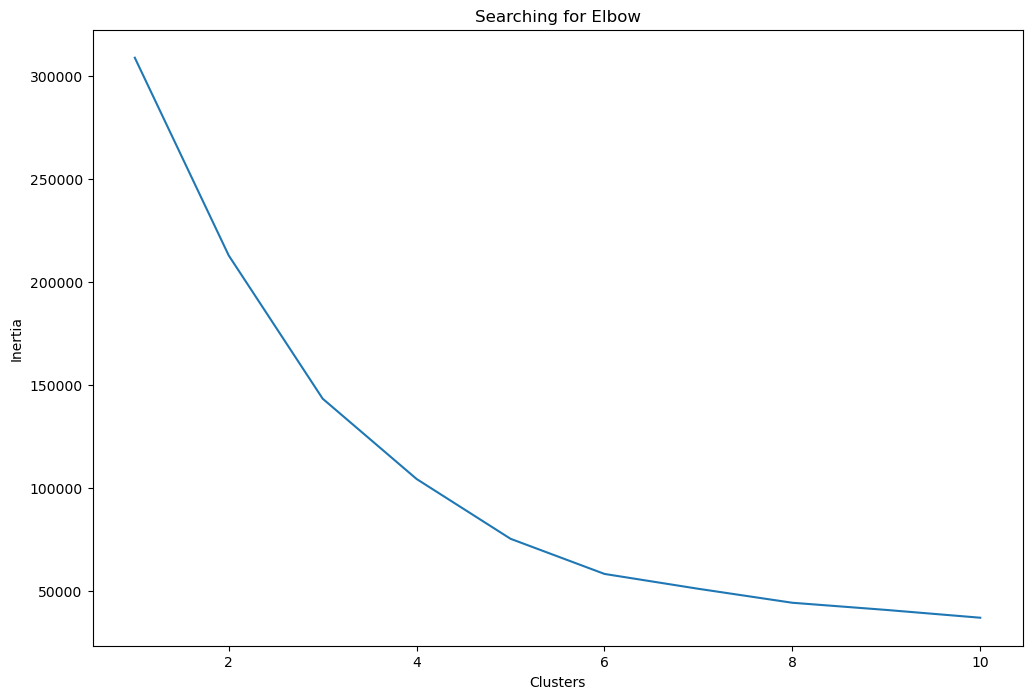

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
sb.lineplot(x=list(range(1, 11)), y=inertias, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

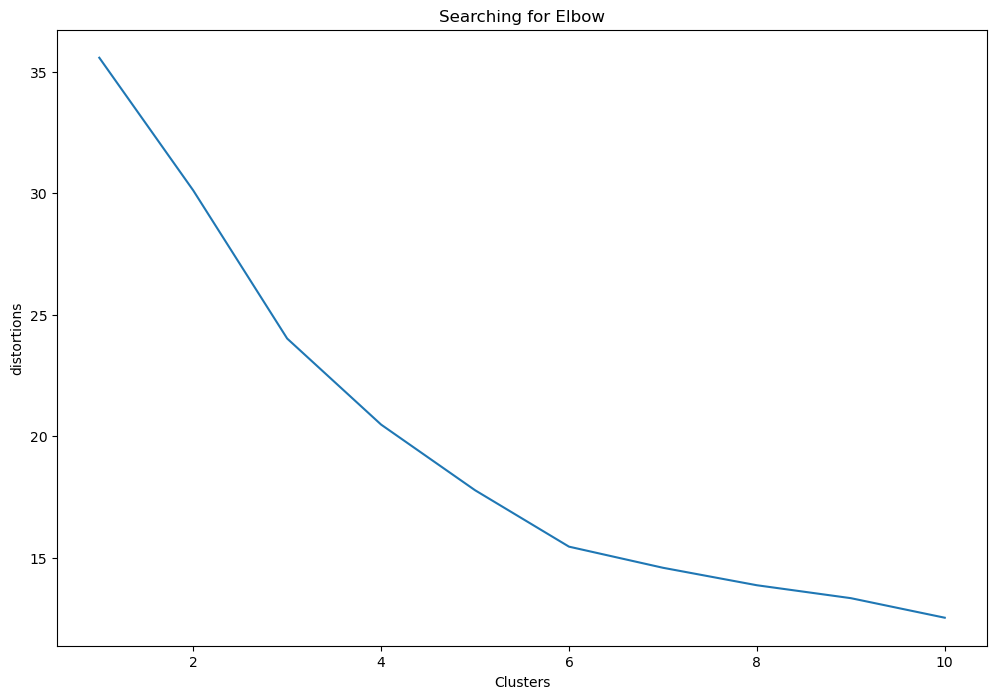

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
sb.lineplot(x=list(range(1, 11)), y=distortions, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('distortions')
plt.show()

In [23]:
col = df.columns

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             200 non-null    int64
 1   Income          200 non-null    int64
 2   spending_score  200 non-null    int64
 3   sex             200 non-null    uint8
dtypes: int64(3), uint8(1)
memory usage: 6.4+ KB


In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.20,random_state = 5)

In [26]:
print(train.shape)

print(test.shape)

(160, 4)
(40, 4)


In [27]:
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

func = StandardScaler()
func.fit(train)
func.fit(test)
train = func.transform(train)
test = func.transform(test)

In [28]:
print(train.shape)

print(test.shape)

(160, 4)
(40, 4)


In [29]:
train = pd.DataFrame(train,columns = ['Age','Income','spending_score','sex'])
train.head()

,Age,Income,spending_score,sex
0,-0.893381,0.875502,1.043134,0.733799
1,2.308081,-0.369478,0.200603,0.733799
2,0.144931,1.196787,-1.083255,-1.362770
3,-1.412537,-0.690763,0.722170,0.733799
4,-0.806855,-1.253012,1.043134,-1.362770


In [41]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=5, random_state=5).fit(train)

In [42]:
train_labels = kmeans_model.labels_

In [43]:
test = pd.DataFrame(test,columns = ['Age','Income','spending_score','sex'])
test.head()

,Age,Income,spending_score,sex
0,0.837139,0.433735,0.401205,0.733799
1,-0.028121,-0.088353,0.040121,-1.362770
2,-0.547277,0.875502,-1.003014,0.733799
3,-0.547277,0.875502,1.725183,-1.362770
4,0.577561,0.875502,-1.243737,0.733799


In [44]:
test.shape

(40, 4)

In [45]:
test_labels = kmeans_model.fit_predict(test)
test_labels

array([0, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 3, 0, 1, 1, 3, 3, 0, 4, 2, 0,
       0, 2, 1, 0, 2, 3, 0, 3, 3, 4, 1, 1, 0, 1, 2, 0, 2, 0])

In [46]:
kmeans_model.cluster_centers_

array([[ 0.75679335, -0.51004016, -0.39547392,  0.73379939],
       [ 0.17377302,  0.03659081,  0.66421787, -1.36277029],
       [-0.12426093,  1.28603302, -0.3165065 ,  0.73379939],
       [-1.49906269, -1.05220884,  0.98964005, -0.31448545],
       [-1.02316978,  0.7751004 , -1.76530388, -1.36277029]])

In [47]:
kmeans_model.get_params

<bound method BaseEstimator.get_params of KMeans(n_clusters=5, random_state=5)>

In [48]:
train.shape

(160, 4)

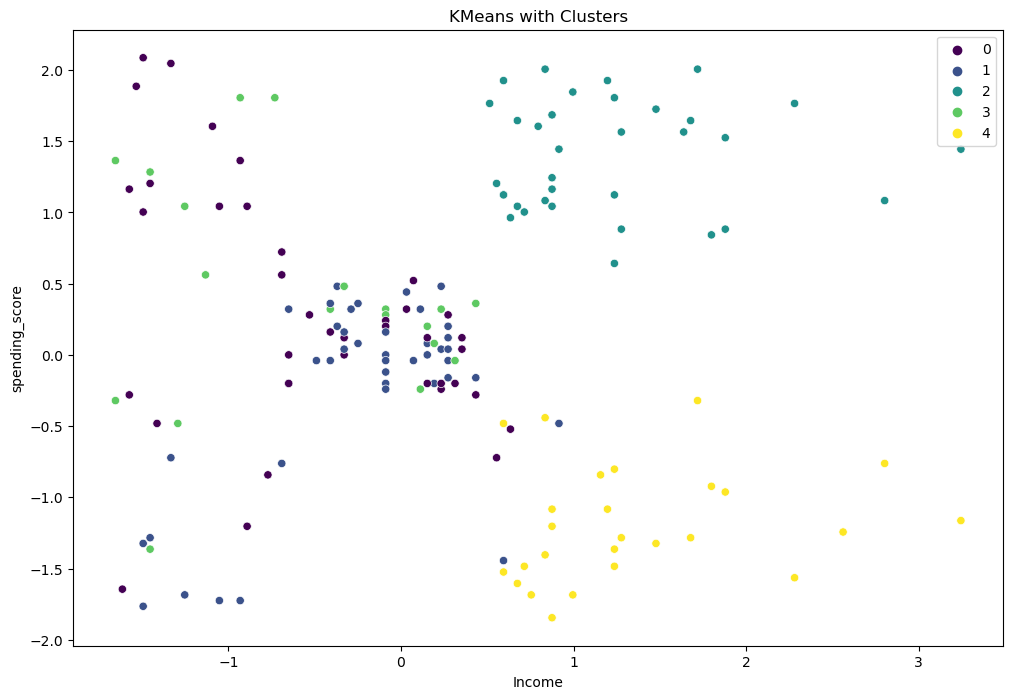

In [49]:
plt.figure(figsize=(12, 8))
sb.scatterplot(data=train,x = train['Income'], y = train['spending_score'], hue = train_labels,palette='viridis')
plt.title('KMeans with Clusters')
plt.show()

In [50]:
test.shape

(40, 4)

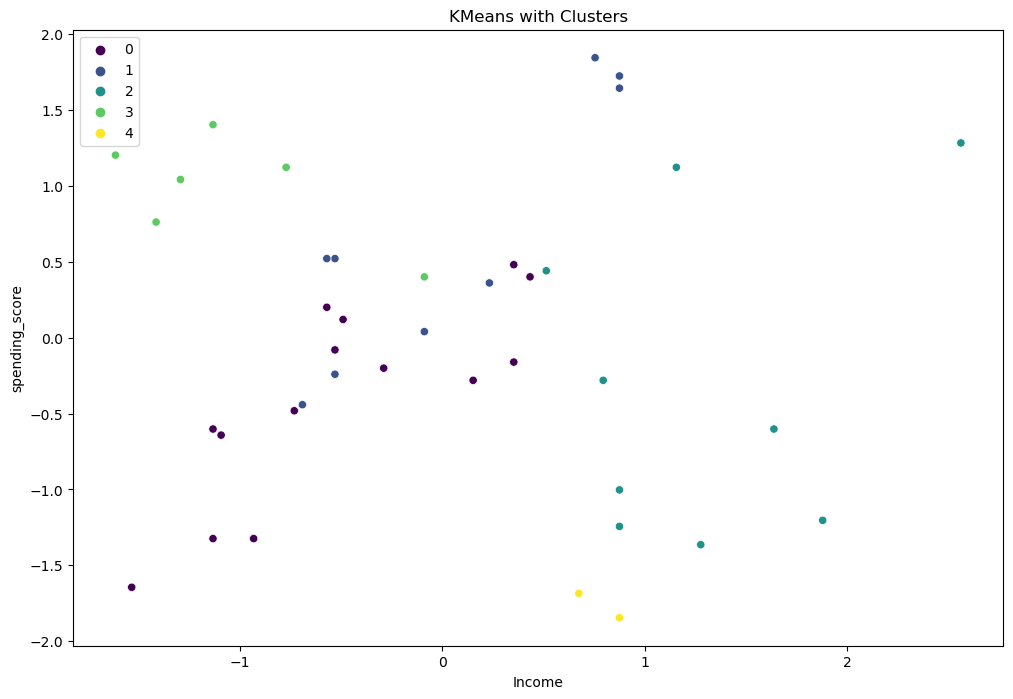

In [51]:

plt.figure(figsize=(12, 8))
sb.scatterplot(data=test,x = test['Income'], y = test['spending_score'], hue = test_labels,palette='viridis')
plt.title('KMeans with Clusters')
plt.show()